# Multi-Class Prediction of Obesity Risk
https://www.kaggle.com/competitions/playground-series-s4e2/data?select=sample_submission.csv


In [2]:
!unzip test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pandas as pd

In [5]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


<ipython-input-7-2b171f926514>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_test, x='id', y='family_history_with_overweight', inner='box', palette='Dark2')


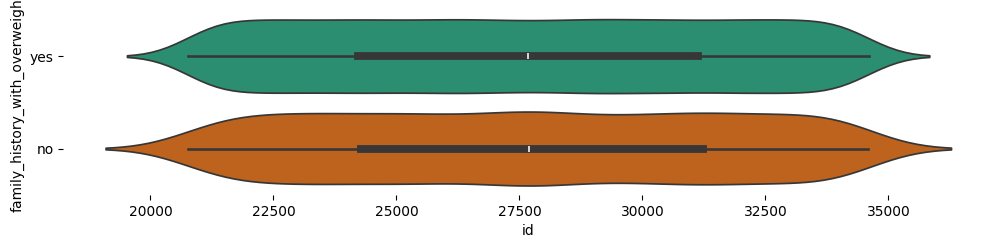

In [7]:
# @title family_history_with_overweight vs id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test['family_history_with_overweight'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test, x='id', y='family_history_with_overweight', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Data processing

### One hot encoding

In [10]:
import pandas as pd

# Initialize the DataFrame with your data
# Assuming df_train is your DataFrame
df_encoded = df_train.copy()

# List of columns to one-hot encode
columns_to_encode = ['Gender', 'CAEC', 'FAF', 'family_history_with_overweight',
                     'FAVC', 'CALC', 'MTRANS', 'SMOKE', 'SCC', 'NObeyesdad']

# Perform one-hot encoding for each column and concatenate with the original DataFrame
for col in columns_to_encode:
    one_hot_encoded = pd.get_dummies(df_encoded[col], prefix=col)
    df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

# Drop the original columns
df_encoded.drop(columns=columns_to_encode, inplace=True)

print(df_encoded)


          id        Age    Height      Weight      FCVC       NCP      CH2O  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...      ...        ...       ...         ...       ...       ...       ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20754  20754  18.000000  1.710000   50.000000  3.000000  4.000000  1.000000   
20755  20755  20.101026  1.819557  105.580491  2.407817  3.000000  2.000000   
20756  20756  33.852953  1.700000   83.520113  2.671238  1.971472  2.144838   
20757  20757  26.680376  1.816547  118.134898  3.000000  3.000000  2.003563   

            TUE  Gender_Female  Gender_Male  ...  S

## Exploratory Data Analysis

In [11]:
import seaborn as sns

sns.pairplot(df_encoded)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7df8b3c2cee0> (for post_execute):


ValueError: Image size of 349250x349250 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 349250x349250 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 349250x349250 with 2652 Axes>

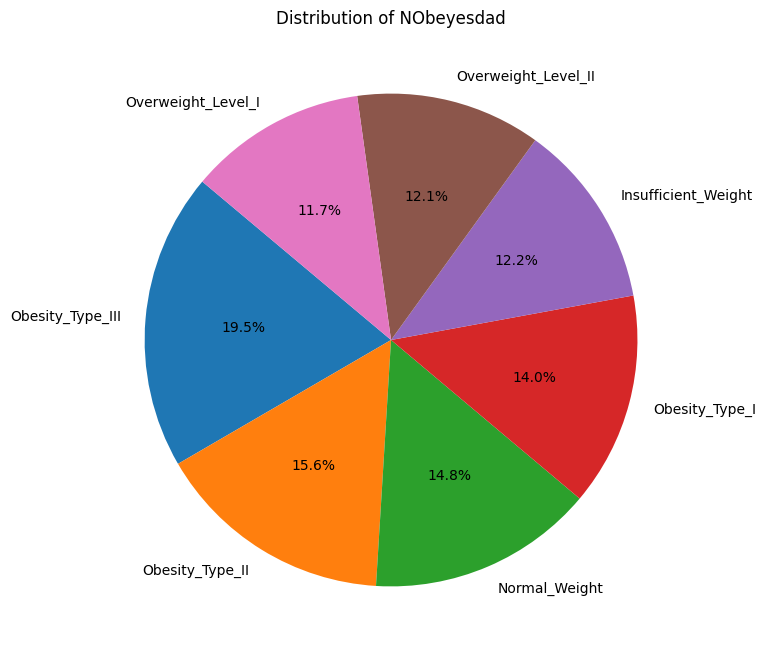

In [12]:
import matplotlib.pyplot as plt

# Group the data by 'NObeyesdad' and count the occurrences
counts = df_train['NObeyesdad'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of NObeyesdad')
plt.show()

In [ ]:
import seaborn as sns

sns.heatmap(df_encoded)

## Scikit-learn models

## Training a neural network for prediction

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df_train contains your DataFrame with 'NObeyesdad' as the target variable
# Convert categorical variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
df_train['NObeyesdad_encoded'] = label_encoder.fit_transform(df_train['NObeyesdad'])

# One-hot encode the target variable
target_one_hot = tf.one_hot(df_train['NObeyesdad_encoded'], depth=len(label_encoder.classes_))

# Split the data into features and target
X = df_train.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)  # Features
y = target_one_hot  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([ 9958,  7841,  9293, ...,  5390,   860, 15795])